In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
place = pd.read_csv(r"C:\Datasets\college_student_placement_dataset.csv")
place.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [28]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [29]:
place.shape

(10000, 10)

In [30]:
placement_rate = place['Placement'].value_counts(normalize=True)
placement_rate

Placement
No     0.8341
Yes    0.1659
Name: proportion, dtype: float64

In [31]:
place.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [32]:
place.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [33]:
place.isna().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [34]:
len(place.College_ID.unique())

100

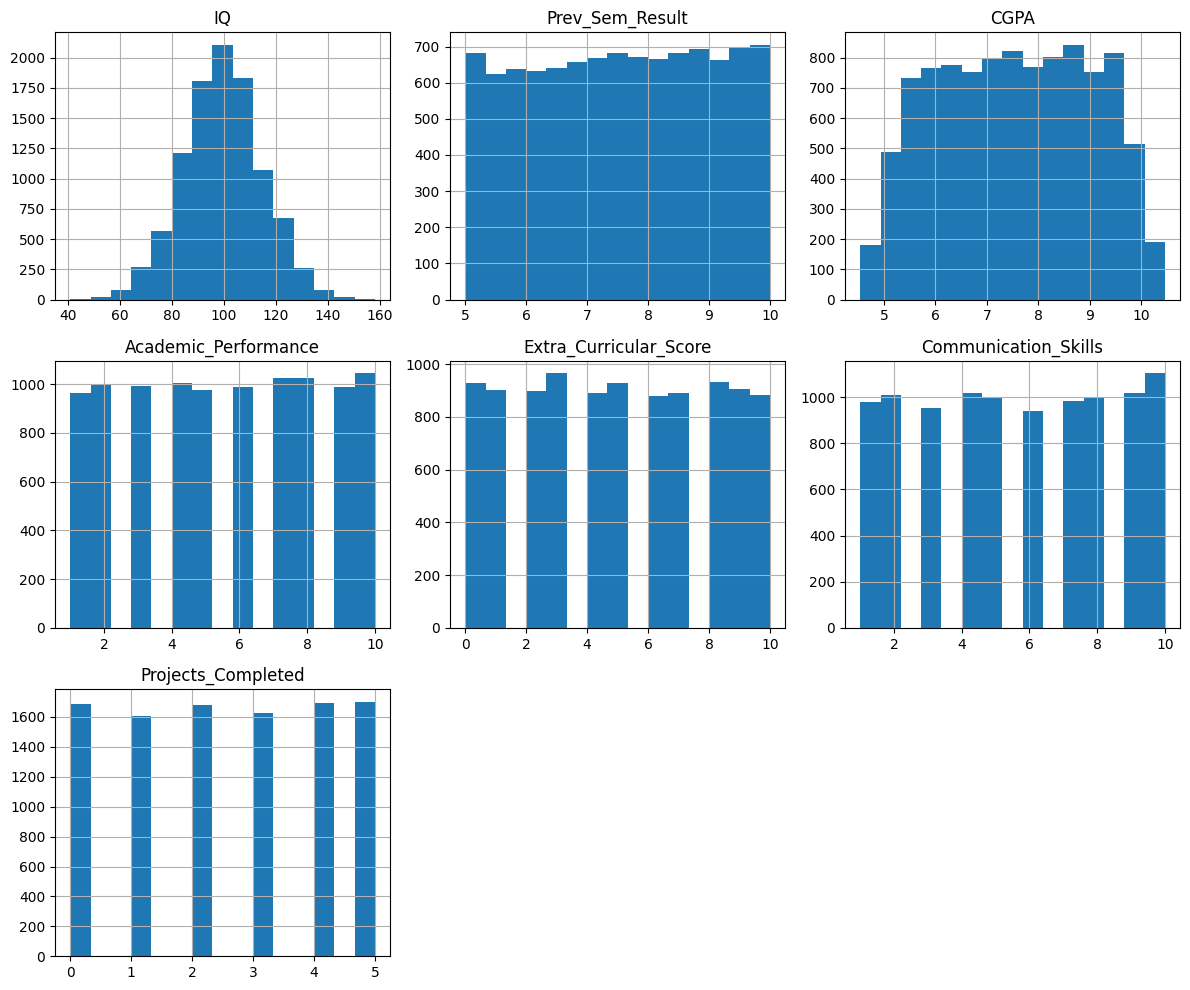

In [35]:
num_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score',
            'Communication_Skills', 'Projects_Completed']

place[num_cols].hist(figsize=(12, 10), bins=15)
plt.tight_layout()
plt.show()

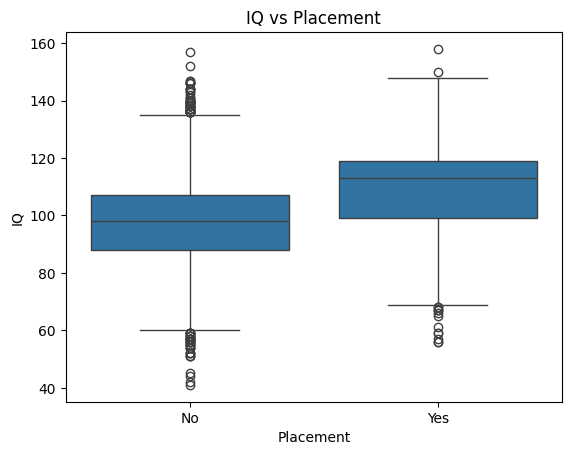

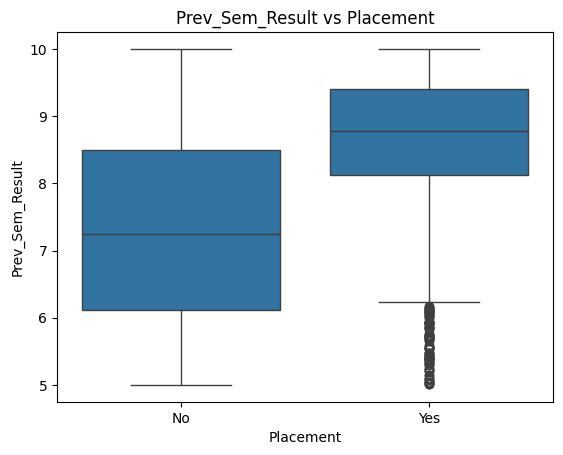

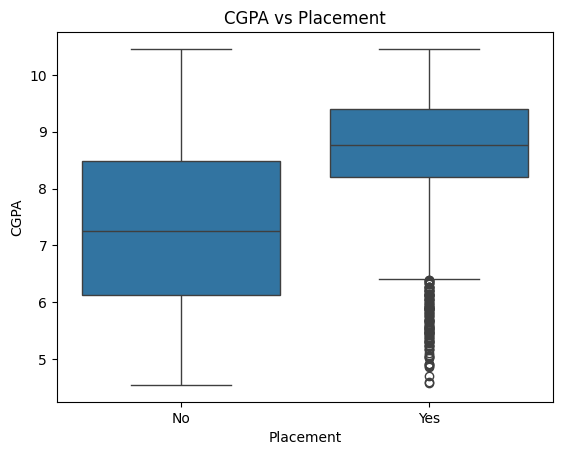

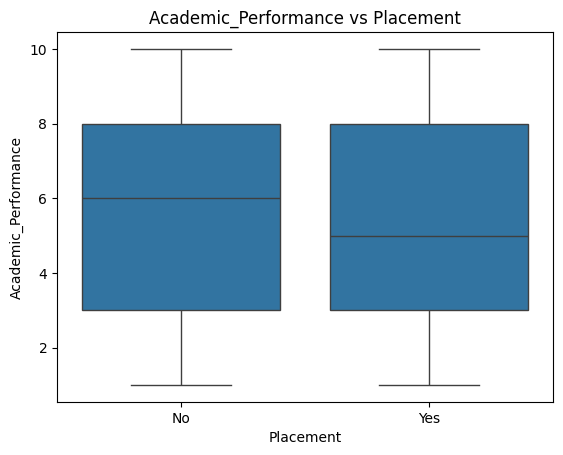

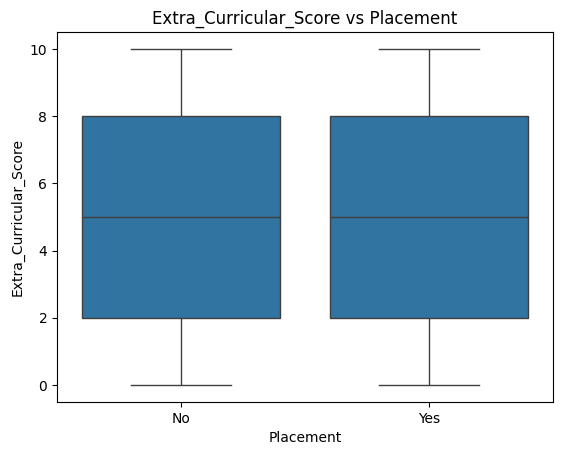

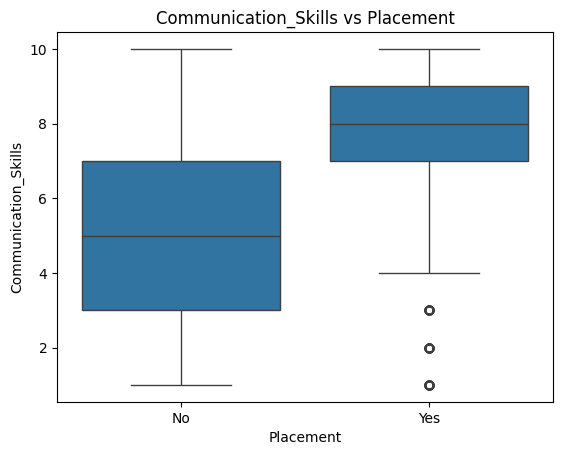

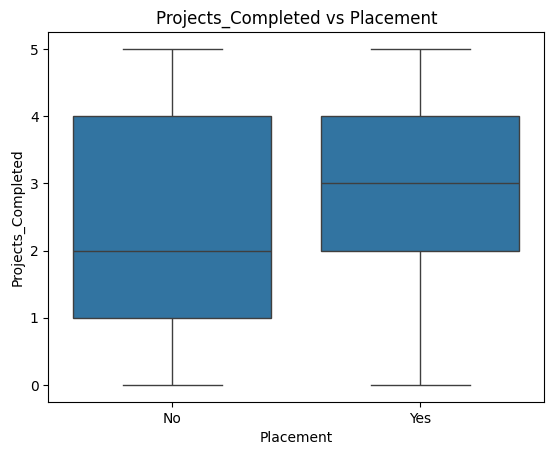

In [36]:
for col in num_cols:
    place[col] = pd.to_numeric(place[col], errors='coerce')  # convert or NaN if error


for col in num_cols:
    sns.boxplot(data=place, x='Placement', y=col)
    plt.title(f'{col} vs Placement')
    plt.show()

In [37]:
place = place.drop(columns=["Prev_Sem_Result"])

In [38]:
place

,College_ID,IQ,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.28,8,No,8,8,4,No
1,CLG0061,97,5.37,8,No,7,8,0,No
2,CLG0036,109,5.83,9,No,3,1,1,No
3,CLG0055,122,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.92,3,No,7,5,1,No


# Correlation Matrix

In [39]:
len(place.Placement.unique())

2

In [40]:
place["Placement_encoding"] = place["Placement"].apply(lambda x: 1 if x == 'Yes' else 0)
place.head()

,College_ID,IQ,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Placement_encoding
0,CLG0030,107,6.28,8,No,8,8,4,No,0
1,CLG0061,97,5.37,8,No,7,8,0,No,0
2,CLG0036,109,5.83,9,No,3,1,1,No,0
3,CLG0055,122,5.75,6,Yes,1,6,1,No,0
4,CLG0004,96,7.69,7,No,8,10,2,No,0


In [41]:
place["Internship_encoding"] = place["Internship_Experience"].apply(lambda x: 1 if x == 'Yes' else 0)
place.head()

,College_ID,IQ,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement,Placement_encoding,Internship_encoding
0,CLG0030,107,6.28,8,No,8,8,4,No,0,0
1,CLG0061,97,5.37,8,No,7,8,0,No,0,0
2,CLG0036,109,5.83,9,No,3,1,1,No,0,0
3,CLG0055,122,5.75,6,Yes,1,6,1,No,0,1
4,CLG0004,96,7.69,7,No,8,10,2,No,0,0


In [42]:
corr_matrix = place[['IQ','CGPA','Academic_Performance', 'Internship_encoding', 'Extra_Curricular_Score','Communication_Skills', 'Projects_Completed', 'Placement_encoding']].corr()

In [43]:
corr_matrix

,IQ,CGPA,Academic_Performance,Internship_encoding,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement_encoding
IQ,1.000000,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
CGPA,-0.002859,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.006827,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_encoding,-0.000247,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003458,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.010896,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.014538,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement_encoding,0.285914,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


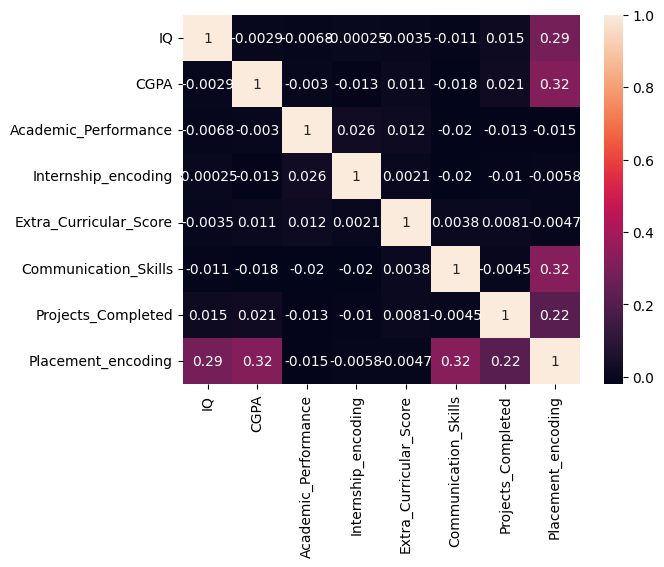

In [44]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [45]:
encoding = place.loc[:,'College_ID'].str.get_dummies()
encoding

,CLG0001,CLG0002,CLG0003,CLG0004,CLG0005,CLG0006,CLG0007,CLG0008,CLG0009,CLG0010,...,CLG0091,CLG0092,CLG0093,CLG0094,CLG0095,CLG0096,CLG0097,CLG0098,CLG0099,CLG0100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
